Match Storytelling by Shot

In [66]:
import pandas as pd
import numpy as np
from mplfooty.pitch import Pitch
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 100
pd.options.display.max_columns = 999

Load Data

In [40]:
df_chain = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/match_chains.csv")
df_chain.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021


In [2]:
df_shots = pd.read_csv("/Users/ciaran/Documents/Projects/AFL/git-repositories/expected-score-model/data/shot_chains_xScore.csv", low_memory=False)
df_shots.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
0,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,0.0,0.0,0.0,Kick,Handball Received,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,26.0,1.0,8.246211,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,False,6,True,0,1,0,0,0,0.377382,0.423225,0.206330,0.374782,0.420309,0.204908,2.669003
1,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,6.0,0.0,6.0,Kick,Handball Received,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,19.0,1.0,7.000000,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,False,53,True,0,0,0,1,0,0.309688,0.365276,0.175964,0.363941,0.429268,0.206791,2.612916
2,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,12.0,0.0,12.0,Kick,Gather,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,21.0,1.0,4.000000,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,False,83,False,0,0,0,1,0,0.362279,0.450421,0.230483,0.347282,0.431775,0.220943,2.515469
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698


Cumulative xScore Chart

In [42]:
match_id = "202101_BrisbaneLions_Sydney"

In [45]:
df_match_chain = df_chain[df_chain['Match_ID'] == match_id]
df_match_chain.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year
0,1,centreBounce,goal,1.0,1,13,13.0,Brisbane Lions,NaN,NaN,NaN,Centre Bounce,0.0,0.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
1,1,centreBounce,goal,2.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Hard Ball Get,8.0,-5.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
2,1,centreBounce,goal,3.0,1,13,24.0,Brisbane Lions,Brisbane Lions,Dayne Zorko,Dayne_Zorko,Handball,9.0,-6.0,ineffective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
3,1,centreBounce,goal,4.0,1,13,28.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Loose Ball Get,11.0,-7.0,NaN,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021
4,1,centreBounce,goal,5.0,1,13,29.0,Brisbane Lions,Sydney,Oliver Florent,Oliver_Florent,Handball,12.0,-5.0,effective,NaN,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021


In [63]:
def get_quarter_duration(chain_data, quarter):
    
    quarter_data = chain_data[chain_data['Quarter'] == quarter]
    
    if "endQuarter" in list(set(quarter_data['Final_State'])):
        duration = quarter_data[(quarter_data['Final_State'] == "endQuarter")]['Quarter_Duration'].iloc[0]
    else:
        duration = quarter_data['Quarter_Duration'].max()
        
    return duration

In [65]:
duration_q1 = get_quarter_duration(df_match_chain, 1)
duration_q2 = get_quarter_duration(df_match_chain, 2)
duration_q3 = get_quarter_duration(df_match_chain, 3)
duration_q4 = get_quarter_duration(df_match_chain, 4)
duration_q1, duration_q2, duration_q3, duration_q4

(1692.0, 2103.0, 2067.0, 1921.0)

In [44]:
df_match = df_shots[df_shots['Match_ID'] == match_id]
df_match.head()

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore
0,1,centreBounce,goal,11.0,1,13,39.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,26.0,-21.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,0.0,0.0,0.0,Kick,Handball Received,Handball,Gather from Opposition,26.0,18.0,11.0,6.0,-21.0,-23.0,-26.0,-27.0,39.0,38.0,37.0,36.0,26.0,1.0,8.246211,52.0,21.0,56.080300,0.383818,21.991130,0.106164,6.082774,0.327040,18.737997,2704.0,3.951244,False,6,True,0,1,0,0,0,0.377382,0.423225,0.206330,0.374782,0.420309,0.204908,2.669003
1,6,possGain,goal,61.0,1,149,168.0,Brisbane Lions,Brisbane Lions,Zac Bailey,Zac_Bailey,Kick,35.0,19.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,6.0,0.0,6.0,Kick,Handball Received,Handball,Loose Ball Get,35.0,28.0,25.0,22.0,19.0,19.0,26.0,29.0,168.0,167.0,165.0,165.0,19.0,1.0,7.000000,43.0,19.0,47.010637,0.416065,23.838740,0.125105,7.167963,0.389831,22.335680,1849.0,3.761200,False,53,True,0,0,0,1,0,0.309688,0.365276,0.175964,0.363941,0.429268,0.206791,2.612916
2,10,possGain,goal,110.0,1,285,306.0,Brisbane Lions,Brisbane Lions,Joe Daniher,Joe_Daniher,Kick,50.0,24.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,6,0,12.0,0.0,12.0,Kick,Gather,Kick Inside 50 Result,Kick Into F50,50.0,50.0,50.0,-8.0,24.0,28.0,28.0,44.0,306.0,305.0,304.0,303.0,21.0,1.0,4.000000,28.0,24.0,36.878178,0.708626,40.601295,0.132764,7.606837,0.424028,24.295030,784.0,3.332205,False,83,False,0,0,0,1,0,0.362279,0.450421,0.230483,0.347282,0.431775,0.220943,2.515469
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698


In [68]:
df_match['Duration'] = np.where(df_match['Quarter'] == 1, df_match['Quarter_Duration'],
                                np.where(df_match['Quarter'] == 2, duration_q1 + df_match['Quarter_Duration'],
                                         np.where(df_match['Quarter'] == 3, duration_q1 + duration_q2 + df_match['Quarter_Duration'],
                                                  np.where(df_match['Quarter'] == 4, duration_q1 + duration_q2 + duration_q3 + df_match['Quarter_Duration'],
                                                           0))))

In [70]:
team1 = list(set(df_match['Team']))[0]
df_team1 = df_match[df_match['Team'] == team1]
df_team1['xScore_cum'] = df_team1['xScore'].cumsum()
# df_team1_q1 = df_team1[df_team1['Quarter'] == 1]

team2 = list(set(df_match['Team']))[1]
df_team2 = df_match[df_match['Team'] == team2]
df_team2['xScore_cum'] = df_team2['xScore'].cumsum()
# df_team2_q1 = df_team2[df_team2['Quarter'] == 1]

In [71]:
df_team2

,Chain_Number,Initial_State,Final_State,Order,Quarter,Quarter_Duration_Chain_Start,Quarter_Duration,Team_Chain,Team,Player,AFL_API_Player_ID,Description,x,y,Disposal,Shot_At_Goal,Behind_Detail,Venue_Width,Venue_Length,Home_Team,Away_Team,Home_Team_Direction_Q1,Match_ID,Round_ID,Year,Goal,Behind,Miss,Score,Home_Score,Away_Score,Home_Current_Score,Away_Current_Score,Current_Margin,Event_Type0,Event_Type1,Event_Type2,Event_Type3,x0,x1,x2,x3,y0,y1,y2,y3,Quarter_Duration0,Quarter_Duration1,Quarter_Duration2,Quarter_Duration3,Chain_Duration,Time_Since_Last_Action,Distance_Since_Last_Action,Distance_to_Right_Goal_x,Distance_to_Middle_y,Distance_to_Middle_Goal,Angle_to_Middle_Goal,Angle_to_Middle_Goal_degrees,Visible_Goal_Angle,Visible_Goal_Angle_degrees,Visible_Behind_Angle,Visible_Behind_Angle_degrees,Squared_Distance_to_Middle_Goal,Log_Distance_to_Middle_Goal,Set_Shot,random100,ModellingFilter,ballUp,centreBounce,kickIn,possGain,throwIn,xGoals,xBehinds,xMiss,xGoals_normalised,xBehinds_normalised,xMiss_normalised,xScore,Duration,xScore_cum
3,17,kickIn,behind,183.0,1,520,582.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,46.0,-41.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,0.0,18.0,Kick,Mark On Lead,Kick Inside 50 Result,Kick Into F50,46.0,49.0,49.0,19.0,-41.0,-35.0,-35.0,-49.0,582.0,550.0,548.0,548.0,62.0,32.0,6.708204,32.0,41.0,52.009614,0.908067,52.028396,0.075999,4.354442,0.235146,13.472898,1024.0,3.465736,True,4,True,0,0,1,0,0,0.238486,0.395111,0.376768,0.236039,0.391057,0.372903,1.807294,582.0,1.807294
4,21,possGain,goal,222.0,1,653,666.0,Sydney,Sydney,Logan McDonald,Logan_McDonald,Kick,34.0,15.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,18.0,1.0,17.0,Kick,Handball Received,Handball,Handball Received,34.0,19.0,10.0,7.0,15.0,17.0,20.0,20.0,666.0,664.0,662.0,662.0,13.0,2.0,15.132746,44.0,15.0,46.486557,0.328553,18.824710,0.130930,7.501763,0.408345,23.396432,1936.0,3.784190,False,39,True,0,0,0,1,0,0.490217,0.479007,0.195058,0.421047,0.411419,0.167535,2.937698,666.0,4.744992
5,28,possGain,behind,295.0,1,859,911.0,Sydney,Sydney,Sam Reid,Sam_Reid,Kick,52.0,35.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,7.0,11.0,Kick,Contested Mark,Contest Target,Kick Inside 50 Result,52.0,57.0,57.0,57.0,35.0,28.0,28.0,28.0,911.0,883.0,881.0,879.0,52.0,28.0,8.602325,26.0,35.0,43.600459,0.931882,53.392925,0.088007,5.042426,0.275978,15.812373,676.0,3.258097,True,45,True,0,0,0,1,0,0.399118,0.384128,0.168722,0.419256,0.403509,0.177235,2.919046,911.0,7.664038
6,34,possGain,behind,354.0,1,1015,1080.0,Sydney,Sydney,Josh P. Kennedy,Josh_P._Kennedy,Kick,45.0,16.0,ineffective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,1,0,1,0,1,18.0,8.0,10.0,Kick,Uncontested Mark,Kick,Handball Received,45.0,48.0,34.0,34.0,16.0,13.0,1.0,-2.0,1080.0,1046.0,1045.0,1045.0,65.0,34.0,4.242641,33.0,16.0,36.674242,0.451453,25.866357,0.158231,9.065951,0.505731,28.976251,1089.0,3.496508,True,2,True,0,0,0,1,0,0.623022,0.346286,0.040090,0.617221,0.343062,0.039717,4.046391,1080.0,11.710428
7,38,possGain,miss,392.0,1,1148,1153.0,Sydney,Sydney,Errol Gulden,Errol_Gulden,Kick,40.0,-11.0,clanger,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,0,0,1,0,0,0,18.0,9.0,9.0,Kick,Handball Received,Handball,Loose Ball Get,40.0,36.0,34.0,32.0,-11.0,-10.0,-9.0,-7.0,1153.0,1150.0,1149.0,1148.0,5.0,3.0,4.123106,38.0,11.0,39.560081,0.281772,16.144339,0.156423,8.962369,0.495369,28.382581,1444.0,3.637586,False,8,True,0,0,0,1,0,0.423338,0.390075,0.268897,0.391143,0.360410,0.248447,2.707269,1153.0,14.417697
9,46,possGain,goal,476.0,1,1383,1389.0,Sydney,Sydney,Isaac Heeney,Isaac_Heeney,Kick,56.0,6.0,effective,True,NaN,138,156,Brisbane Lions,Sydney,right,202101_BrisbaneLions_Sydney,202101,2021,1,0,0,6,0,6,19.0,9.0,10.0,Kick,Handba

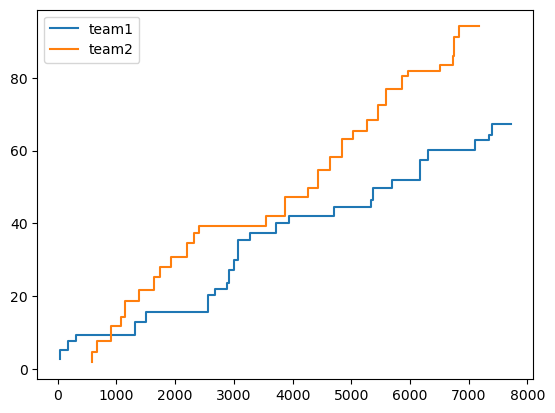

In [72]:
fig = plt.figure()
ax = plt.subplot(111)

ax.step(df_team1['Duration'], df_team1['xScore_cum'], label = 'team1')
ax.step(df_team2['Duration'], df_team2['xScore_cum'], label = 'team2')

ax.legend()

Lollipop xScore Chart

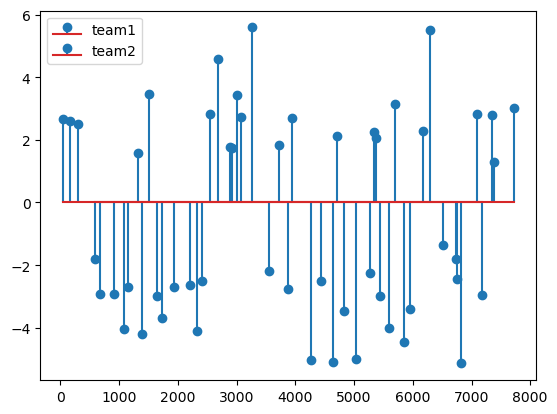

In [75]:
fig = plt.figure()
ax = plt.subplot(111)

ax.stem(df_team1['Duration'], df_team1['xScore'], label = 'team1')
ax.stem(df_team2['Duration'], -1*df_team2['xScore'], label = 'team2')

ax.legend()